In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('hotel_booking.csv')

In [3]:
print(raw_data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [4]:
print(raw_data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [5]:
print(raw_data.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
print(raw_data.shape)

(119390, 36)


In [7]:
raw_data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [8]:
raw_data['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [10]:
missing_data_cols = ['country', 'agent', 'company']
for col in missing_data_cols:
    print(raw_data[col].value_counts())

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
DMA        1
SDN        1
ASM        1
BWA        1
Name: country, Length: 177, dtype: int64
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
273.0      1
415.0      1
352.0      1
253.0      1
497.0      1
Name: company, Length: 352, dtype: int64


In [11]:
print(raw_data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [13]:
print((raw_data.isna().sum()/len(raw_data)))

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [14]:
 raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


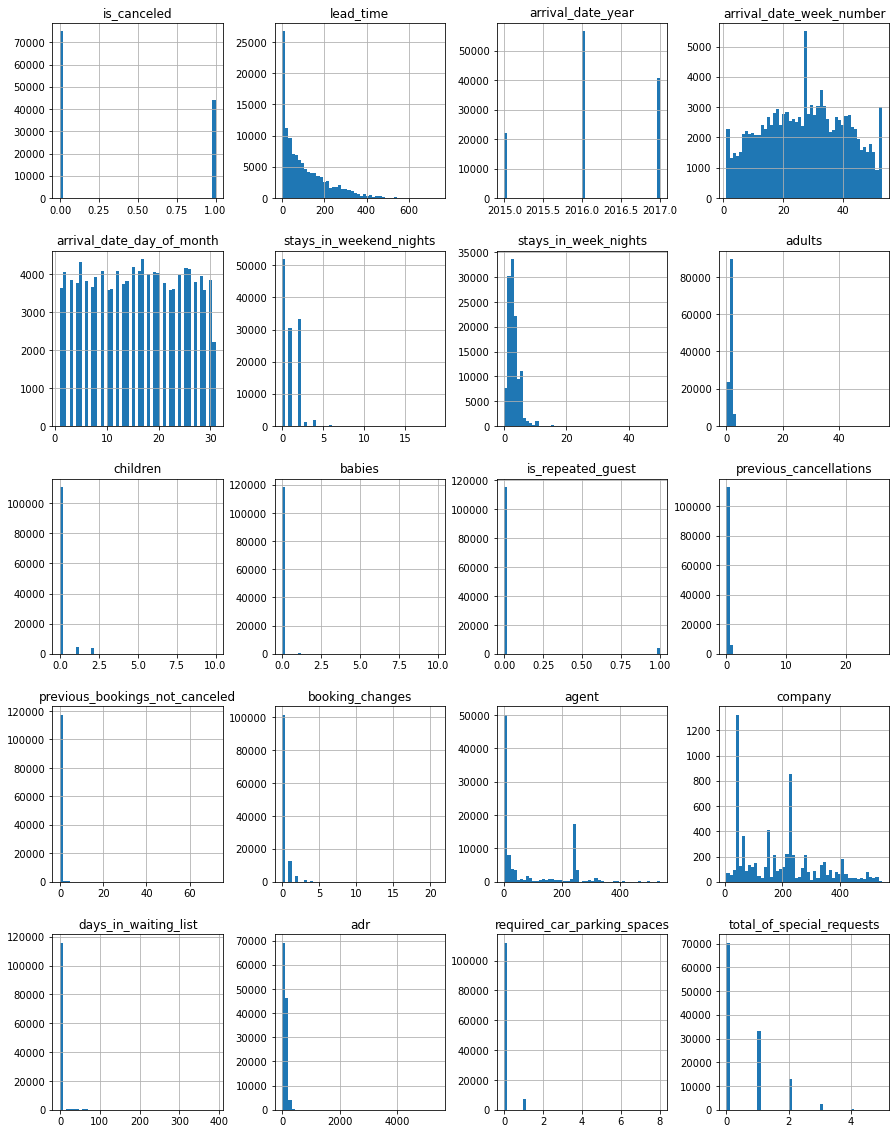

In [16]:
raw_data.hist(bins=50, figsize=(15,20))

<AxesSubplot:>

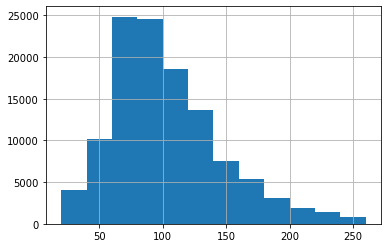

In [21]:
raw_data['adr'].hist(bins=[20,40,60,80,100,120,140,160,180,200,220,240,260])

<AxesSubplot:>

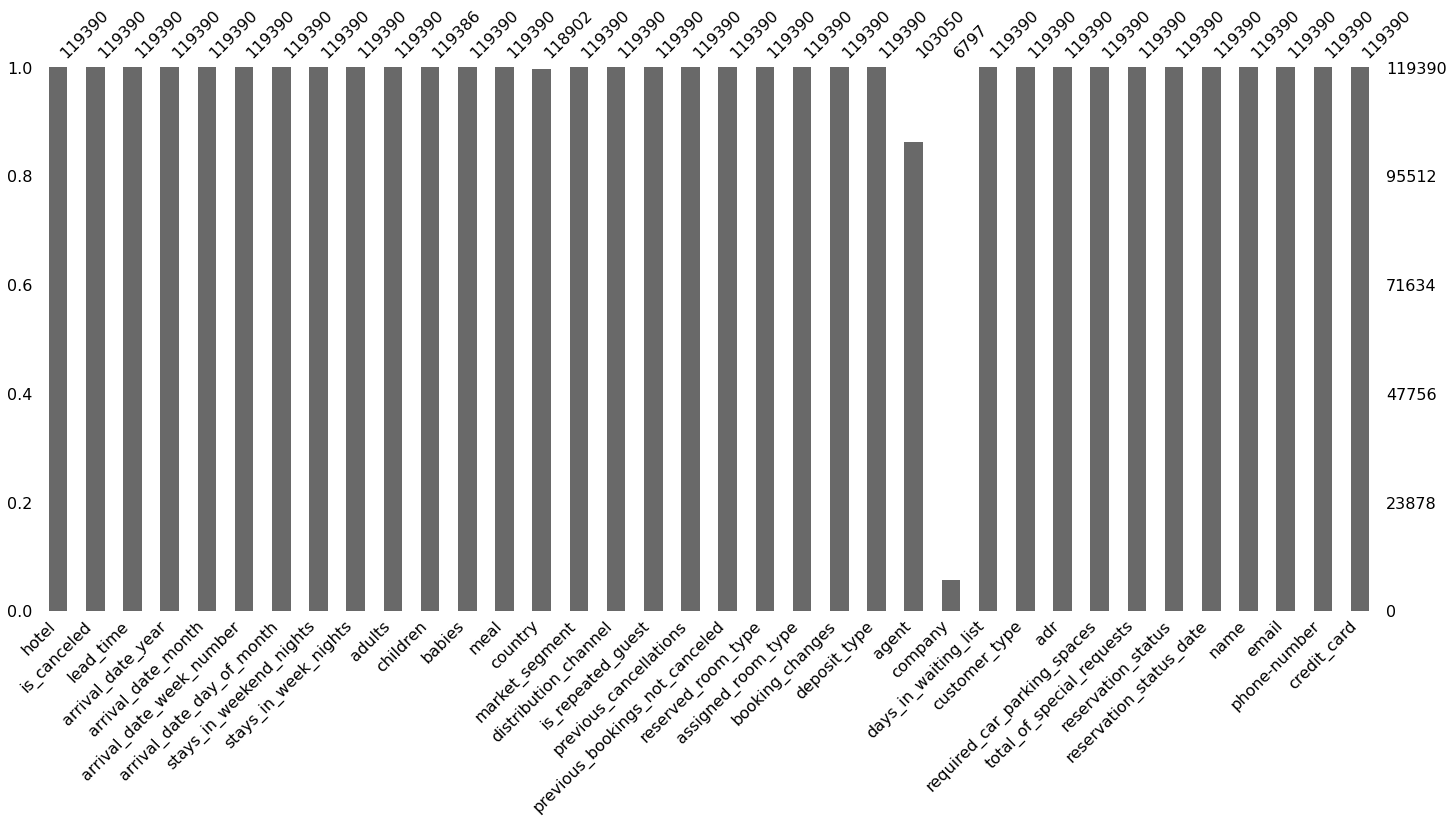

In [22]:
import missingno as msno
msno.bar(raw_data)

<AxesSubplot:>

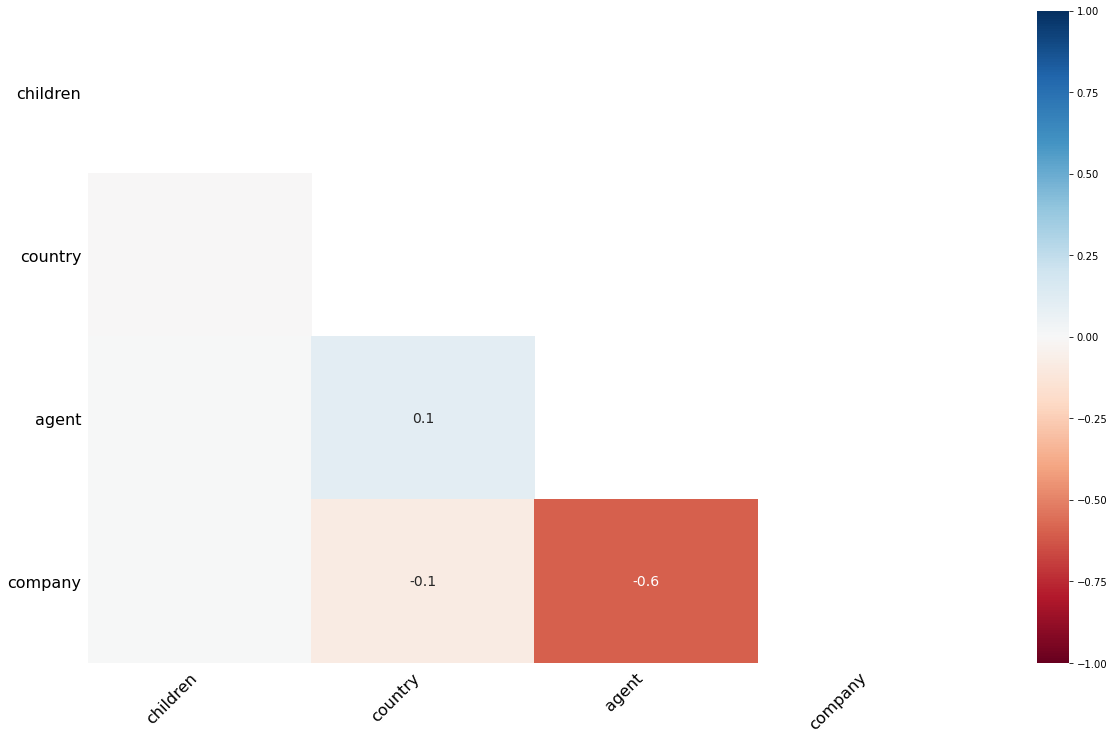

In [23]:
msno.heatmap(raw_data)

So it seems that samples with 'agent' are leisure travelers and 'company' is business travelers. We don't have a hypothesis one way or the other which type of traveler might cancel more, but this in an interesting insight nonetheless.

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set = train_test_split(raw_data, test_size = 0.2, random_state = 42,\
                                       stratify = raw_data['is_canceled'])

In [27]:
train_set['is_canceled'].value_counts(normalize=True)

0    0.629586
1    0.370414
Name: is_canceled, dtype: float64

In [28]:
# Copy train set for some further analysis
hotels = train_set.copy()

In [30]:
corr_matrix = hotels.corr()

In [32]:
corr_matrix['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293034
previous_cancellations            0.111525
adults                            0.057953
days_in_waiting_list              0.053600
adr                               0.046147
stays_in_week_nights              0.025650
arrival_date_year                 0.017537
arrival_date_week_number          0.007270
children                          0.005648
stays_in_weekend_nights           0.000977
arrival_date_day_of_month        -0.006720
company                          -0.023931
babies                           -0.030659
previous_bookings_not_canceled   -0.057203
agent                            -0.079114
is_repeated_guest                -0.086247
booking_changes                  -0.141886
required_car_parking_spaces      -0.194639
total_of_special_requests        -0.236955
Name: is_canceled, dtype: float64

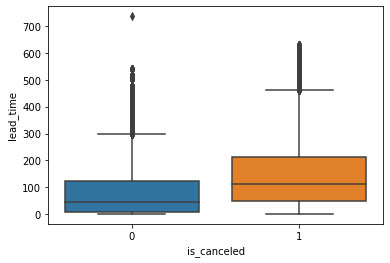

In [33]:
_ = sns.boxplot(x='is_canceled', y='lead_time', data=hotels)

In [38]:
hotels['adr_per_person'] = hotels['adr']/(hotels['adults'] + hotels['children'] + hotels['babies'])

In [40]:
hotels['adr_per_adult'] = hotels['adr']/hotels['adults']
corr_matrix = hotels.corr()
corr_matrix['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293034
previous_cancellations            0.111525
adults                            0.057953
days_in_waiting_list              0.053600
adr                               0.046147
stays_in_week_nights              0.025650
adr_per_adult                     0.018660
adr_per_person                    0.018597
arrival_date_year                 0.017537
arrival_date_week_number          0.007270
children                          0.005648
stays_in_weekend_nights           0.000977
arrival_date_day_of_month        -0.006720
company                          -0.023931
babies                           -0.030659
previous_bookings_not_canceled   -0.057203
agent                            -0.079114
is_repeated_guest                -0.086247
booking_changes                  -0.141886
required_car_parking_spaces      -0.194639
total_of_special_requests        -0.236955
Name: is_canceled, dtype: float64

In [42]:
# Resetting train set and separating features from labels
hotels = train_set.drop('is_canceled', axis=1)
hotel_labels = train_set['is_canceled'].copy()

In [43]:
hotels.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [44]:
hotels['customer_type'].value_counts()

Transient          71610
Transient-Party    20217
Contract            3243
Group                442
Name: customer_type, dtype: int64

In [45]:
hotels.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [48]:
hotels.nunique()

hotel                                 2
lead_time                           474
arrival_date_year                     3
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights              16
stays_in_week_nights                 34
adults                               13
children                              5
babies                                5
meal                                  5
country                             172
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       65
reserved_room_type                   10
assigned_room_type                   12
booking_changes                      21
deposit_type                          3
agent                               327
company                             337
days_in_waiting_list                122


In [52]:
# Storing categorical columns for future reference
CAT_COLS = ['hotel', 'arrival_date_month', 'market_segment','distribution_channel', \
                    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', \
                           'deposit_type', 'customer_type', 'reservation_status']

In [50]:
# Storing numeric columns by creating a correlation matrix (which only uses numbers) and getting its index
NUM_COLS = list(hotels.corr().index)

In [51]:
print(NUM_COLS)

['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [53]:
# Removing column that is in fact a cat. variable
NUM_COLS.remove('is_repeated_guest')

Now we are going to select the best attributes from numerical and categorical variables. We do this in order to  
minimize the number of attributes of our final dataset with as little impact as possible to predictive power.  
Lastly, we will compare the performances of the two different kinds of models: numeric data only, numeric and categorical. Note that we will transform country into a ternary categorical variable: domestic (Portugal), Europe, and ROW, or alternatively, we will cluster countries.

In [54]:
from sklearn.decomposition import PCA, TruncatedSVD

In [57]:
from sklearn.preprocessing import StandardScaler

In [105]:
hotels_num = hotels[NUM_COLS].copy()

In [59]:
scaler = StandardScaler()

In [67]:
hotels_num = pd.DataFrame(scaler.fit_transform(hotels_num))

In [72]:
hotels_num = hotels[NUM_COLS].copy().fillna(0)

In [73]:
hotels_num = pd.DataFrame(scaler.fit_transform(hotels_num))

In [74]:
pca = PCA()
pca.fit(hotels_num)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [75]:
print(d)

16


In [76]:
hotels_num.shape

(95512, 18)

In [82]:
hotels_num = hotels[NUM_COLS].copy().drop(['agent', 'company'], axis=1).fillna(0)

In [83]:
hotels_num = pd.DataFrame(scaler.fit_transform(hotels_num))

In [84]:
pca = PCA()
pca.fit(hotels_num)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

15


So the lowest number of numeric columns we can get here is 15 (we'll make a note to not include company and agent later as part of NUM_COLS). Let's try just out of curiosity to see the predictive power of a model using only these numeric columns. Regardless of the result, we'll create our numeric column pipeline which will consist of dropping agent and company, scaling using StandardScaler then using PCA to remove one dimension.

In [87]:
pca = PCA(n_components=15)
hotels_num = pca.fit_transform(hotels_num)

In [88]:
hotels_num.shape

(95512, 15)

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
log_clf = LogisticRegression().fit(hotels_num, hotel_labels)

In [92]:
log_clf.score(hotels_num, hotel_labels)

0.7360226987184857

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1).fit(hotels_num, hotel_labels)

In [96]:
tree_clf.score(hotels_num, hotel_labels)

0.6886569226903426

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest_clf = RandomForestClassifier().fit(hotels_num, hotel_labels)

In [99]:
forest_clf.score(hotels_num, hotel_labels)

0.9901268950498366

Now, let's move on to creating the numeric pipeline. It will consist of imputing 0s for missing values, scaling w/ StandardScaler, and reducing from 16 to 15 dimensions using PCA.

In [101]:
from sklearn.pipeline import Pipeline

In [104]:
from sklearn.impute import SimpleImputer

In [106]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()), ('pca', PCA(n_components=15))])

Now, let's prepare the categorical data by encoding it and potentially reducing its dimenstionality.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('hotel_booking.csv')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw_data, test_size = 0.2, random_state = 42,\
                                       stratify = raw_data['is_canceled'])

In [4]:
# Resetting train set and separating features from labels
hotels = train_set.drop('is_canceled', axis=1)
hotel_labels = train_set['is_canceled'].copy()

In [5]:
# Storing categorical columns for future reference
CAT_COLS = ['hotel', 'arrival_date_month', 'market_segment','distribution_channel', \
                    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', \
                           'deposit_type', 'customer_type', 'reservation_status']

In [6]:
# Storing numeric columns by creating a correlation matrix (which only uses numbers) and getting its index
NUM_COLS = list(hotels.corr().index)

In [7]:
# Removing column that is in fact a cat. variable
NUM_COLS.remove('is_repeated_guest')

In [8]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [9]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()), ('pca', PCA(n_components=15))])


In [10]:
countries = hotels[['country']].copy()


In [11]:
print(countries.head())

       country
105447     IRL
85242      FRA
65604      PRT
17345      GBR
117786     ESP


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

countries = hotels[['country']].copy()

In [53]:
class CategoryLimiter(BaseEstimator, TransformerMixin):

	def __init__(self, threshold):
		self.threshold = threshold

	def fit(self, X, y=None):
		return self

	def transform(self, X):
		assert isinstance(X, (pd.Series, pd.DataFrame))
		values_pct = pd.DataFrame(X.value_counts(normalize=True))
		cumsum = np.cumsum(values_pct.iloc[:,0])
		z = np.argmax(cumsum >= self.threshold) + 1
		top_z_categories = list(values_pct.index[:z])
		other_cats = set(list(values_pct.index)).difference(set(top_z_categories))
		other_cats = list(other_cats)
		X.replace(other_cats, 'Other', inplace=True)
		return X

In [48]:
cat_lim = CategoryLimiter(threshold = 0.95)

In [49]:
cat_lim.fit_transform(countries)

[('PRT',), ('GBR',), ('FRA',), ('ESP',), ('DEU',), ('ITA',), ('IRL',), ('BEL',), ('BRA',), ('NLD',), ('USA',), ('CHE',), ('CN',), ('AUT',), ('SWE',), ('CHN',), ('POL',), ('ISR',), ('RUS',), ('NOR',), ('ROU',), ('AUS',), ('FIN',)]
[('ARM',), ('IRQ',), ('LBY',), ('JPN',), ('ISL',), ('GLP',), ('HRV',), ('SGP',), ('PLW',), ('BIH',), ('GTM',), ('BGR',), ('ZMB',), ('TMP',), ('BHR',), ('MDG',), ('TGO',), ('AIA',), ('BHS',), ('NAM',), ('PAK',), ('ATA',), ('MCO',), ('MDV',), ('KAZ',), ('TWN',), ('VEN',), ('JEY',), ('TZA',), ('ZWE',), ('SAU',), ('CYM',), ('DMA',), ('GEO',), ('ECU',), ('NZL',), ('PRI',), ('GAB',), ('UZB',), ('SMR',), ('IDN',), ('MKD',), ('LKA',), ('HUN',), ('KOR',), ('NGA',), ('UMI',), ('OMN',), ('AGO',), ('JAM',), ('MWI',), ('MLI',), ('MAC',), ('SDN',), ('CUB',), ('LAO',), ('HND',), ('SUR',), ('TUN',), ('UKR',), ('SRB',), ('AND',), ('BLR',), ('SVK',), ('ATF',), ('CYP',), ('LUX',), ('URY',), ('SLV',), ('MUS',), ('VGB',), ('KNA',), ('SVN',), ('GHA',), ('COM',), ('QAT',), ('BGD',),

,country
105447,IRL
85242,FRA
65604,PRT
17345,GBR
117786,ESP
...,...
104906,Other
50818,RUS
36939,CN
14587,GBR


In [51]:
countries.value_counts()

country
PRT        38934
GBR         9684
FRA         8318
ESP         6832
DEU         5838
Other       4419
ITA         2992
IRL         2681
BEL         1882
BRA         1775
NLD         1706
USA         1666
CHE         1383
CN          1010
AUT         1006
SWE          817
CHN          801
POL          731
ISR          533
RUS          520
NOR          468
ROU          404
AUS          364
FIN          357
dtype: int64

In [52]:
countries.value_counts().shape

(24,)

We have now created our custom CategoryLimiter transformer that will reduce the number of country dimensions to the countries representing 95% of the instances, or in this case, 24. This number still seems a bit high, so let's see whether we can reduce it further using PCA.

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
encoder = OneHotEncoder()

In [70]:
svd = TruncatedSVD(n_components=20, random_state=42)

In [71]:
svd.fit(countries)

TruncatedSVD(n_components=20, random_state=42)

In [72]:
cumsum = np.cumsum(svd.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

In [73]:
print(d)

13


Next steps: work with categorical data all together, then use columntransformer for country + other categorical columns then featureiunion to unite country/categorical w/ numerical data.

Immediate next steps: edit the numeric pipeline to add SimpleImputer with strategy to fill NAs with 0s, keep standardscaler and take out PCA. PCA will be the last step applied to the whole of the data set combined. So:  

Numeric pipeline: SimpleImputer(0s), StandardScaler()  
Country pipeline: SimpleImputer (Other), CategoryLimiter(95%), OneHotEncoder  
Full pipeline: pipeline(Columtransfomer(numeric(num_cols), country(country_col), onehotencoder(cat_cols), PCA or TSVD)

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)), \
                         ('std_scaler', StandardScaler())])

In [79]:
country_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                ('limiter', CategoryLimiter(threshold=0.95)), \
                                    ('encoder', OneHotEncoder())])

In [80]:
countries = hotels[['country']].copy()

In [81]:
print(CAT_COLS)
print(NUM_COLS)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [84]:
COUNTRY_COL = list(countries.columns)
print(COUNTRY_COL)
print(type(COUNTRY_COL))

['country']
<class 'list'>


In [85]:
from sklearn.compose import ColumnTransformer

In [86]:
beta_pipeline = ColumnTransformer([('num', num_pipeline, NUM_COLS), ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(), CAT_COLS)])

In [99]:
# Resetting training set
hotels = train_set.drop('is_canceled', axis=1).copy()

In [88]:
svd = TruncatedSVD(n_components=30, random_state=42)

In [90]:
country_pipeline = Pipeline([('limiter', CategoryLimiter(threshold=0.95)), \
                             ('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                    ('encoder', OneHotEncoder())])

In [91]:
beta_pipeline = ColumnTransformer([('num', num_pipeline, NUM_COLS), ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(), CAT_COLS)])

In [92]:
hotels = train_set.drop('is_canceled', axis=1).copy()

In [93]:
hotels_transformed = beta_pipeline.fit_transform(hotels)

In [94]:
hotels_transformed

<95512x103 sparse matrix of type '<class 'numpy.float64'>'
	with 2769848 stored elements in Compressed Sparse Row format>

In [96]:
svd.fit(hotels_transformed)
cumsum = np.cumsum(svd.explained_variance_ratio_)
print(cumsum)

[0.00488913 0.09961102 0.17638764 0.24306514 0.30852287 0.35838777
 0.40734211 0.4543019  0.49926355 0.5419497  0.5827377  0.62166353
 0.65897301 0.69356996 0.72716918 0.75929941 0.78772589 0.80883786
 0.82870131 0.84667888 0.86314618 0.87773772 0.88812149 0.89734921
 0.90414051 0.91074202 0.91640515 0.92203379 0.92673476 0.93092396]


In [97]:
svd = TruncatedSVD(n_components=35, random_state=42)
svd.fit(hotels_transformed)
cumsum = np.cumsum(svd.explained_variance_ratio_)
print(cumsum)

[0.00488913 0.09961102 0.17638764 0.24306514 0.30852287 0.35838777
 0.40734211 0.4543019  0.49926355 0.5419497  0.5827377  0.62166353
 0.65897301 0.69356996 0.72716918 0.75929941 0.78772589 0.80883786
 0.82870131 0.84667888 0.86314618 0.87773772 0.88812149 0.89734923
 0.9041406  0.91074227 0.91640558 0.92203491 0.92673951 0.93093342
 0.93499754 0.938881   0.94272306 0.94647937 0.94989293]


Therefore, we can capture 94.99% of the variance w/ only 35 features. Let's add 36 to definitely surpass 95% of the variance and use this hyperparameter to create and add a TruncatedSVD object to our final pipeline and finally begin model selection and evaluation.

In [98]:
# Full pipeline object, with appropriate transformations for each column type united by a ColumnTransformer
# object followed by a TruncatedSVD reducing the dataset to 36 features, which capture 95% of the variance
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=36, random_state=42))])

In [100]:
# Resetting training set
hotels = train_set.drop('is_canceled', axis=1).copy()

In [101]:
hotels_prepared = full_pipeline.fit_transform(hotels)

In [103]:
hotels_prepared.shape

(95512, 36)

# Final Model Selection/Evaluation

In [105]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)

In [106]:
tree_clf.fit(hotels_prepared, hotel_labels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)

In [113]:
tree_clf.score(hotels_prepared, hotel_labels)

0.850353882234693

In [108]:
log_clf = LogisticRegression().fit(hotels_prepared, hotel_labels)

In [109]:
log_clf.score(hotels_prepared, hotel_labels)

1.0

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

Now, let's evaluate both of these rudimentary models using AUC and cross-validation.

In [120]:
def score_classifier(model, X, y):
	"""Does something. Edit this later."""

	# Compute cross-validated Acc. scores: cv_accuracy
	cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')

	# Print list of Acc. scores
	print(f"Accuracy scores computed using 10-fold cross-validation: {cv_accuracy}")
	print(f"Mean accuracy score computed using 10-fold cross-validation: {cv_accuracy.mean()}")
	print(f"Accuracy score std. deviation computed using 10-fold cross-validation: {cv_accuracy.std()}")


In [121]:
score_classifier(tree_clf, hotels_prepared, hotel_labels)
score_classifier(log_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.84694305 0.84872278 0.85101037 0.84671762 0.84839284 0.85331379
 0.85258088 0.8445189  0.853942   0.84923045]
Mean accuracy score computed using 10-fold cross-validation: 0.849537266612615
Accuracy score std. deviation computed using 10-fold cross-validation: 0.0029500677808970573
Accuracy scores computed using 10-fold cross-validation: [1.        1.        1.        1.        1.        0.9998953 1.
 1.        1.        1.       ]
Mean accuracy score computed using 10-fold cross-validation: 0.999989529892158
Accuracy score std. deviation computed using 10-fold cross-validation: 3.1410323526326334e-05


In [122]:
hotels_prepared

array([[ 2.34355401, -1.55313388, -3.71158085, ..., -0.13656376,
        -0.13123568, -0.04309134],
       [ 2.48252849, -0.84512169, -0.8126376 , ...,  0.58113299,
         0.4895435 ,  0.50241186],
       [ 2.42946182, -0.38827406, -0.33002859, ..., -0.35423937,
         0.04169682, -0.03494081],
       ...,
       [ 2.11816329,  1.69958954, -0.68457788, ...,  0.10877576,
        -0.1925053 , -0.21860192],
       [ 1.86049853,  1.23743236,  0.71456919, ..., -0.04406991,
        -0.46403934,  0.20435132],
       [ 1.93421178, -1.05101838,  0.09666959, ..., -0.3294096 ,
        -0.24233725,  0.02393333]])

In [123]:
hotels_prepared.shape

(95512, 36)

In [124]:
hotel_labels

105447    0
85242     0
65604     1
17345     0
117786    0
         ..
104906    0
50818     1
36939     0
14587     1
6068      0
Name: is_canceled, Length: 95512, dtype: int64

In [125]:
log_clf = LogisticRegression()

In [126]:
log_clf.fit(hotels_prepared, hotel_labels)

LogisticRegression()

In [127]:
score_classifier(log_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [1.        1.        1.        1.        1.        0.9998953 1.
 1.        1.        1.       ]
Mean accuracy score computed using 10-fold cross-validation: 0.999989529892158
Accuracy score std. deviation computed using 10-fold cross-validation: 3.1410323526326334e-05


In [130]:
log_clf = LogisticRegression(C=0.2, random_state=42)

In [131]:
log_clf.fit(hotels_prepared, hotel_labels)

LogisticRegression(C=0.2, random_state=42)

In [132]:
score_classifier(log_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [1.        1.        1.        1.        1.        0.9998953 1.
 1.        1.        1.       ]
Mean accuracy score computed using 10-fold cross-validation: 0.999989529892158
Accuracy score std. deviation computed using 10-fold cross-validation: 3.1410323526326334e-05


In [134]:
from sklearn.svm import SVC

In [135]:
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)

In [136]:
svm_clf.fit(hotels_prepared, hotel_labels)

SVC(C=5, coef0=1, kernel='poly')

In [137]:
svm_clf.score(hotels_prepared, hotel_labels)

1.0

In [1]:
print(1+1)

2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('hotel_booking.csv')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw_data, test_size = 0.2, random_state = 42,\
                                       stratify = raw_data['is_canceled'])

In [4]:
# Resetting train set and separating features from labels
hotels = train_set.drop('is_canceled', axis=1)
hotel_labels = train_set['is_canceled'].copy()

In [5]:
# Storing categorical columns for future reference
CAT_COLS = ['hotel', 'arrival_date_month', 'market_segment','distribution_channel', \
                    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', \
                           'deposit_type', 'customer_type', 'reservation_status']
# Storing numeric columns by creating a correlation matrix (which only uses numbers) and getting its index
NUM_COLS = list(hotels.corr().index)


In [6]:
# Removing column that is in fact a cat. variable
NUM_COLS.remove('is_repeated_guest')

In [7]:
print(CAT_COLS)
print(NUM_COLS)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [8]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin


In [12]:
class CategoryLimiter(BaseEstimator, TransformerMixin):

	def __init__(self, threshold):
		self.threshold = threshold

	def fit(self, X, y=None):
		return self

	def transform(self, X):
		assert isinstance(X, (pd.Series, pd.DataFrame))
		values_pct = pd.DataFrame(X.value_counts(normalize=True))
		cumsum = np.cumsum(values_pct.iloc[:,0])
		z = np.argmax(cumsum >= self.threshold) + 1
		top_z_categories = list(values_pct.index[:z])
		other_cats = set(list(values_pct.index)).difference(set(top_z_categories))
		other_cats = list(other_cats)
		X.replace(other_cats, 'Other', inplace=True)
		return X

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [14]:
from sklearn.compose import ColumnTransformer


In [15]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)), \
                         ('std_scaler', StandardScaler())])


country_pipeline = Pipeline([('limiter', CategoryLimiter(threshold=0.95)), \
                             ('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                    ('encoder', OneHotEncoder())])

In [17]:
print(CAT_COLS)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [18]:
countries = hotels[['country']].copy()

COUNTRY_COL = list(countries.columns)
print(COUNTRY_COL)
print(type(COUNTRY_COL))


['country']
<class 'list'>


In [19]:
# Full pipeline object, with appropriate transformations for each column type united by a ColumnTransformer
# object followed by a TruncatedSVD reducing the dataset to 36 features, which capture 95% of the variance
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=36, random_state=42))])

In [20]:
# Resetting training set
hotels = train_set.drop('is_canceled', axis=1).copy()

hotels_prepared = full_pipeline.fit_transform(hotels)

hotels_prepared.shape

(95512, 36)

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [26]:
def score_classifier(model, X, y):
	"""Does something. Edit this later."""

	# Compute cross-validated Acc. scores: cv_accuracy
	cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')

	# Print list of Acc. scores
	print(f"Accuracy scores computed using 10-fold cross-validation: {cv_accuracy}")
	print(f"Mean accuracy score computed using 10-fold cross-validation: {cv_accuracy.mean()}")
	print(f"Accuracy score std. deviation computed using 10-fold cross-validation: {cv_accuracy.std()}")

In [27]:
score_classifier(tree_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.84694305 0.84872278 0.85101037 0.84671762 0.84839284 0.85331379
 0.85258088 0.8445189  0.853942   0.84923045]
Mean accuracy score computed using 10-fold cross-validation: 0.849537266612615
Accuracy score std. deviation computed using 10-fold cross-validation: 0.0029500677808970573


In [28]:
# Full pipeline object, with appropriate transformations for each column type united by a ColumnTransformer
# object followed by a TruncatedSVD reducing the dataset to 18 features, which capture 80% of the variance
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=18, random_state=42))])

In [29]:
# Resetting training set
hotels = train_set.drop('is_canceled', axis=1).copy()
hotels_prepared = full_pipeline.fit_transform(hotels)
hotels_prepared.shape

(95512, 18)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_clf = LogisticRegression().fit(hotels_prepared, hotel_labels)
log_clf.score(hotels_prepared, hotel_labels)

0.9677527431108133

In [33]:
score_classifier(log_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.96984925 0.9660804  0.96869438 0.96900848 0.96817087 0.96942729
 0.96743796 0.96471574 0.96691446 0.96618155]
Mean accuracy score computed using 10-fold cross-validation: 0.96764803759137
Accuracy score std. deviation computed using 10-fold cross-validation: 0.0015817316331245017


In [34]:
score_classifier(tree_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.74947655 0.73502931 0.73416396 0.75301016 0.7284054  0.73573448
 0.73102293 0.74976442 0.73008062 0.73060413]
Mean accuracy score computed using 10-fold cross-validation: 0.7377291958343352
Accuracy score std. deviation computed using 10-fold cross-validation: 0.0088402962345213


In [36]:
hotels = test_set.drop('is_canceled', axis=1).copy()

In [37]:
hotel_labels = test_set['is_canceled'].copy()

In [43]:
# Full pipeline object, with appropriate transformations for each column type united by a ColumnTransformer
# object followed by a TruncatedSVD reducing the dataset to 18 features, which capture 80% of the variance
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=18, random_state=42))])

### need to fit to training set before transform test set!!!!!

In [66]:
country_pipeline = Pipeline([('limiter', CategoryLimiter(threshold=0.95)), \
                             ('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [67]:
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=18, random_state=42))])

In [68]:
hotels = train_set.drop('is_canceled', axis=1)
hotel_labels = train_set['is_canceled'].copy()

In [69]:
hotels_test = test_set.drop('is_canceled', axis=1).copy()
hotel_test_labels = test_set['is_canceled'].copy()

In [70]:
hotels_prepared = full_pipeline.fit_transform(hotels)

In [72]:
hotels_test_prepared = full_pipeline.transform(hotels_test)

In [73]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)
tree_clf.fit(hotels_prepared, hotel_labels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)

In [74]:
score_classifier(tree_clf, hotels_test_prepared, hotel_test_labels)

Accuracy scores computed using 10-fold cross-validation: [0.74246231 0.74036851 0.74958124 0.74329983 0.75083752 0.72152429
 0.73701843 0.74204355 0.75115207 0.7444491 ]
Mean accuracy score computed using 10-fold cross-validation: 0.7422736851412488
Accuracy score std. deviation computed using 10-fold cross-validation: 0.008205024633171298


In [75]:
forest_clf = RandomForestClassifier(n_estimators=25, max_depth=6, min_samples_leaf=0.1, random_state=1)

In [77]:
forest_clf.fit(hotels_prepared, hotel_labels)

RandomForestClassifier(max_depth=6, min_samples_leaf=0.1, n_estimators=25,
                       random_state=1)

In [78]:
score_classifier(forest_clf, hotels_test_prepared, hotel_test_labels)


Accuracy scores computed using 10-fold cross-validation: [0.75628141 0.74497487 0.74832496 0.74497487 0.75502513 0.7298995
 0.75293132 0.73953099 0.75743611 0.75282782]
Mean accuracy score computed using 10-fold cross-validation: 0.7482206978194983
Accuracy score std. deviation computed using 10-fold cross-validation: 0.008196790350587024


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = [{'n_estimators': [5, 15, 25], 'max_features': [2, 4, 6, 8], 'min_samples_leaf': [0.1, 0.2, 0.3]}]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=10, scoring='roc_auc')

In [81]:
grid_search.fit(hotels_prepared, hotel_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_leaf': [0.1, 0.2, 0.3],
                          'n_estimators': [5, 15, 25]}],
             scoring='roc_auc')

In [82]:
grid_search.best_params_

{'max_features': 4, 'min_samples_leaf': 0.1, 'n_estimators': 25}

In [84]:
final_model = RandomForestClassifier(n_estimators=25, max_features=4, min_samples_leaf=0.1)

In [85]:
final_model.fit(hotels_prepared, hotel_labels)

RandomForestClassifier(max_features=4, min_samples_leaf=0.1, n_estimators=25)

In [86]:
score_classifier(final_model, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.74780151 0.75858459 0.74976442 0.75656999 0.74536698 0.75950162
 0.74819391 0.76295676 0.75541828 0.73918961]
Mean accuracy score computed using 10-fold cross-validation: 0.7523347671856648
Accuracy score std. deviation computed using 10-fold cross-validation: 0.007045175587136018


In [87]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [88]:
pred = cross_val_predict(final_model, hotels_prepared, hotel_labels, cv=5)

In [89]:
confusion_matrix(hotel_labels, pred)

array([[58258,  1875],
       [21498, 13881]])

In [90]:
from sklearn.metrics import precision_score, recall_score

In [91]:
precision_score(hotel_labels, pred)
recall_score(hotel_labels, pred)

0.3923513948952769

In [92]:
precision_score(hotel_labels, pred)

0.880997715156131

In [93]:
recall_score(hotel_labels, pred)

0.3923513948952769

In [94]:
country_pipeline = Pipeline([('limiter', CategoryLimiter(threshold=0.50)), \
                             ('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [95]:
full_pipeline = Pipeline([('column_transformer', ColumnTransformer([('num', num_pipeline, NUM_COLS), \
                                ('country', country_pipeline, COUNTRY_COL), \
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), CAT_COLS)])), \
                                          ('svd', TruncatedSVD(n_components=18, random_state=42))])

In [96]:
hotels = train_set.drop('is_canceled', axis=1)
hotel_labels = train_set['is_canceled'].copy()

In [97]:
hotels_prepared = full_pipeline.fit_transform(hotels)

In [98]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, random_state=1)
tree_clf.fit(hotels_prepared, hotel_labels)
score_classifier(tree_clf, hotels_test_prepared, hotel_test_labels)

Accuracy scores computed using 10-fold cross-validation: [0.74246231 0.74036851 0.74958124 0.74329983 0.75083752 0.72152429
 0.73701843 0.74204355 0.75115207 0.7444491 ]
Mean accuracy score computed using 10-fold cross-validation: 0.7422736851412488
Accuracy score std. deviation computed using 10-fold cross-validation: 0.008205024633171298


In [99]:
forest_clf = RandomForestClassifier(n_estimators=25, max_features=4, min_samples_leaf=0.1, random_state=1)
forest_clf.fit(hotels_prepared, hotel_labels)

RandomForestClassifier(max_features=4, min_samples_leaf=0.1, n_estimators=25,
                       random_state=1)

In [100]:
score_classifier(forest_clf, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.81940955 0.80747487 0.82609151 0.81729662 0.81782012 0.81928594
 0.80661711 0.81195686 0.81918124 0.81855303]
Mean accuracy score computed using 10-fold cross-validation: 0.8163686851175571
Accuracy score std. deviation computed using 10-fold cross-validation: 0.005670955480124078


In [102]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [{'n_estimators': [5, 15, 25], 'max_features': [2, 4, 6, 8], \
				'maxforest_clf = RandomForestClassifier()
_depth':[2,4,6,8],'min_samples_leaf': [0.1, 0.2, 0.3]}]
rand_search = RandomizedSearchCV(forest_clf, param_grid, cv=10, scoring='roc_auc')

In [103]:
rand_search.fit(hotels_prepared, hotel_labels)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [2, 4, 6, 8],
                                         'max_features': [2, 4, 6, 8],
                                         'min_samples_leaf': [0.1, 0.2, 0.3],
                                         'n_estimators': [5, 15, 25]}],
                   scoring='roc_auc')

In [104]:
rand_search.best_params_

{'n_estimators': 25,
 'min_samples_leaf': 0.2,
 'max_features': 2,
 'max_depth': 4}

In [105]:
final_model = rand_search.best_estimator_

In [106]:
score_classifier(final_model, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.67546064 0.65201005 0.67856769 0.66485185 0.67228562 0.68809549
 0.69584337 0.6695634  0.69521516 0.65312533]
Mean accuracy score computed using 10-fold cross-validation: 0.6745018587510547
Accuracy score std. deviation computed using 10-fold cross-validation: 0.014737700617822426


In [107]:
final_model.fit(hotels_prepared, hotel_labels)

RandomForestClassifier(max_depth=4, max_features=2, min_samples_leaf=0.2,
                       n_estimators=25)

In [108]:
score_classifier(final_model, hotels_prepared, hotel_labels)

Accuracy scores computed using 10-fold cross-validation: [0.67954355 0.67849665 0.62967229 0.63752487 0.67626427 0.64255052
 0.66390954 0.69165532 0.6598262  0.64328343]
Mean accuracy score computed using 10-fold cross-validation: 0.6602726621275153
Accuracy score std. deviation computed using 10-fold cross-validation: 0.020035128453799917


In [110]:
pred = cross_val_predict(final_model, hotels_prepared, hotel_labels, cv=5)

In [111]:
confusion_matrix(hotel_labels, pred)

array([[60133,     0],
       [32525,  2854]])

In [112]:
precision_score(hotel_labels, pred)

1.0

In [113]:
recall_score(hotel_labels, pred)

0.08066932361005116

In [114]:
forest_clf = RandomForestClassifier(n_estimators=25, max_features=4, min_samples_leaf=0.1, random_state=1)
forest_clf.fit(hotels_prepared, hotel_labels)

RandomForestClassifier(max_features=4, min_samples_leaf=0.1, n_estimators=25,
                       random_state=1)

In [115]:
pred = cross_val_predict(forest_clf, hotels_prepared, hotel_labels, cv=5)

In [116]:
confusion_matrix(hotel_labels, pred)

array([[59257,   876],
       [17013, 18366]])

In [117]:
precision_score(hotel_labels, pred)

0.9544745868412847

In [118]:
recall_score(hotel_labels, pred)

0.5191215127618078

### Let's think back to the business case. We are a hotel attempting to predict whether a certain reservation will be canceled. In this situation, making a Type I error, i.e. incorrectly predicting a cancellation when there will be none, is significantly more costly than a Type II error, or failing to detect a cancellation. The main potential use case for this model, as I described earlier, is helping hotels reach maximum capacity by continuing to advertise (or even potentially double booking) rooms taken up by a reservation our model predicts will be eventually canceled. 

### It is therefore imperative that we are highly confident of our model's decision when it predicts that a particular reservation will be canceled. Otherwise, hotel management and other business stakeholders might commonly recommend double booking (or even outright canceling the original reservation, if they lack understanding of the model, amongst other reasons) rooms for which there is eventually no cancellation, severely impacting customer satisfaction. A type II error, or failing to detect a cancellation, does have the negative impact of potentially leading to empty rooms. However, in this case, there is no potential impact of ruining legitimate reservations. Additionally, given that reservations can, in many cases, be canceled with enough notice to advertise to and attract new guests, not all of them will lead to unfilled inventory and lost revenue.

### We have arrived at a model with 95% precision and 52% recall. In other words - when our model flags a reservation as one that will be canceled we can expect it to be around 95% accurate. On the flip side, our model catches a little over half of all the reservations that will be eventually canceled.  This I believe, to be a more than adequate performance for our business case, for the reasons I have outlined above.


In [1]:
print(1+1)

2
